In [10]:
import stan

import nest_asyncio # https://pystan.readthedocs.io/en/latest/faq.html
nest_asyncio.apply()

In [11]:
# reload packages from notebook whenever needed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import arviz as az # For visualization and loo
import seaborn as sns 

In [17]:
stan_folder = 'stan_code/'
stan_file = stan_folder + 'binom.stan'
with open(stan_file) as file:
    model_code = file.read()
print(model_code)

// Binomial model with beta(1,1,) prior
data {
  int<lower=0> N;
  int<lower=0> y;
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ beta(1,1);
  y ~ binomial(N,theta);
}



In [15]:
stan_data = {'N': 100, 'y': 50} #number of trials, number of successes

In [18]:
compiled_model = stan.build(model_code, data=stan_data, random_seed=1)

Building...



Building: found in cache, done.Messages from stanc:


In [20]:
fit = compiled_model.sample(num_chains=2, num_warmup = 100, num_samples= 100)


Sampling:   0%
Sampling:  50% (200/400)
Sampling: 100% (400/400)
Sampling: 100% (400/400), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10


In [25]:
idata = az.from_pystan(posterior=fit, posterior_model=compiled_model)

In [21]:
summary = az.summary(fit)

In [22]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.504,0.143,0.263,0.762,0.016,0.012,81.0,152.0,0.99


<AxesSubplot: title={'center': 'theta'}>

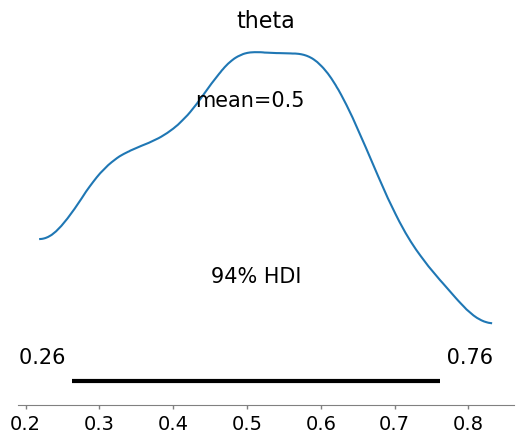

In [26]:
az.plot_posterior(idata)

array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

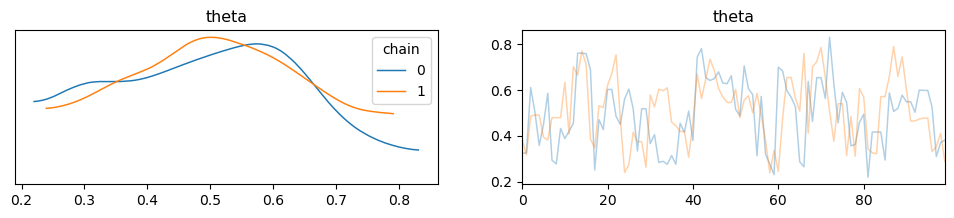

In [23]:
az.plot_trace(fit, compact=False, legend=True)

In [ ]:
data = dict(N=10, y=[0,1,0,0,1,1,1,0,1,0])

Bernoulli model with a Beta(1,1) (uniform) prior

In [ ]:
with open('bern.stan') as file:
    print(file.read())

// Bernoulli model
data {
  int<lower=0> N;
  int<lower=0,upper=1> y[N];
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ beta(1,1);
  y ~ bernoulli(theta);
}



Given the Stan program we then use the `compile_model` method of `stan_utility` module to compile the Stan program into a C++ executable. This utility function automatically saves a cached version of the compiled model to the disk for possible future use.

In [ ]:
model = stan_utility.compile_model('bern.stan')

Using cached StanModel


Getting the model again with the utility function uses the cached version automatically.

In [ ]:
del model
model = stan_utility.compile_model('bern.stan')

Using cached StanModel


Sample from the posterior, show the summary and plot the histogram of the posterior draws. In addition, plot estimated posterior density with arviz posterior plot and 95% credible interval. We recommend explicitly specifying the seed of Stan's random number generator, as we have done here, so that we can reproduce these exactly results in the future, at least when using the same machine, operating system, and interface. This is especially helpful for the more subtle pathologies that may not always be found, which results in seemingly stochastic behavior.

Inference for Stan model: anon_model_4586f2dc76604848221fafe6413762a9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta    0.5  3.7e-3   0.14   0.24    0.4    0.5    0.6   0.76   1420    1.0
lp__   -8.84    0.02   0.71 -10.87  -9.04  -8.57  -8.37  -8.32   1690    1.0

Samples were drawn using NUTS at Wed Dec 19 11:19:21 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


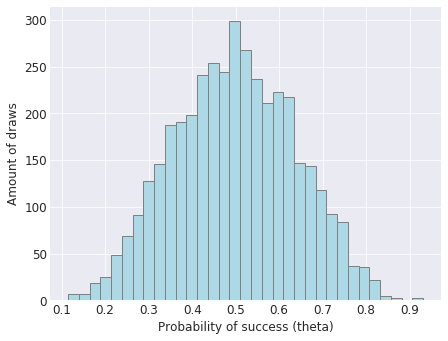

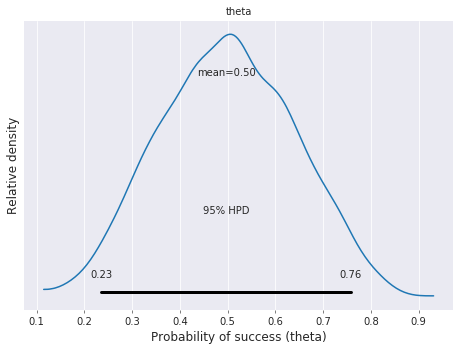

In [ ]:
fit = model.sampling(data=data, seed=194838)
print(fit)
samples = fit.extract(permuted=True)

plt.hist(samples['theta'], 33, color='lightblue', edgecolor='grey')
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Amount of draws')

# Plot with arviz plot_posterior.
#    - round_to: sets accuracy of values in plot
az.plot_posterior(fit, var_names=['theta'], credible_interval=0.95, round_to=2)
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Relative density');

## Binomial model

Instead of sequence of 0's and 1's, we can summarize the data with the number of experiments and the number successes:

In [ ]:
data = dict(N=10, y=7)

And then we use Binomial model with Beta(1,1) prior for the probability of success.

In [ ]:
with open('binom.stan') as file:
    print(file.read())

// Binomial model with beta(1,1,) prior
data {
  int<lower=0> N;
  int<lower=0> y;
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ beta(1,1);
  y ~ binomial(N,theta);
}



Sample from the posterior and plot the posterior. The histogram should look similar as in the Bernoulli case, except that now the number of successes is 7 instead of 5.

Using cached StanModel


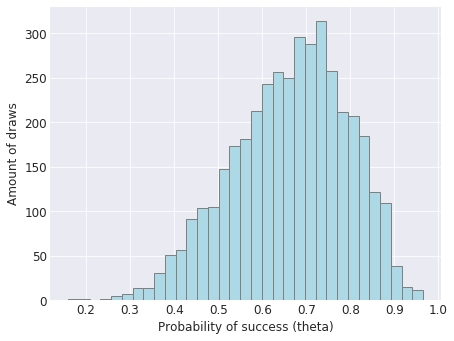

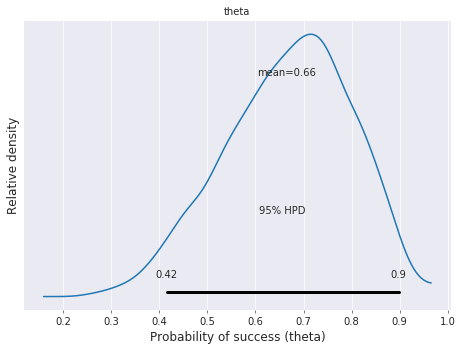

In [ ]:
model = stan_utility.compile_model('binom.stan')
fit = model.sampling(data=data, seed=194838)
samples = fit.extract(permuted=True)
plt.hist(samples['theta'], 33, color='lightblue', edgecolor='grey')
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Amount of draws')

az.plot_posterior(fit, var_names=['theta'], credible_interval=0.95, round_to=2)
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Relative density');

Now we re-run the model with a new data (now number of successes being 70 out of 100). The previously compiled Stan program is re-used making the re-use faster.

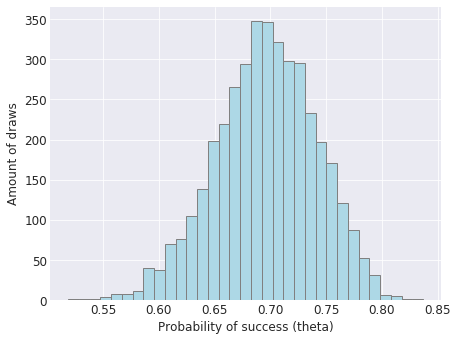

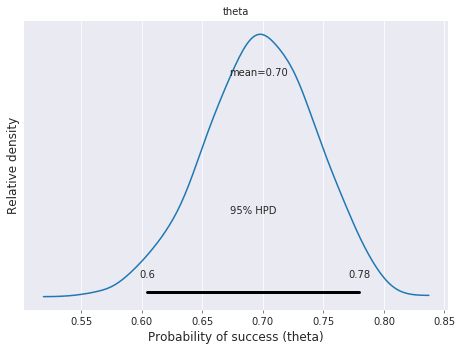

In [ ]:
data = dict(N=100, y=70)
fit = model.sampling(data=data, seed=194838)
samples = fit.extract(permuted=True)
plt.hist(samples['theta'], 33, color='lightblue', edgecolor='grey') # histogram
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Amount of draws')

az.plot_posterior(fit, var_names=['theta'], credible_interval=0.95, round_to=2)
plt.xlabel(r'Probability of success (theta)')
plt.ylabel('Relative density');